In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('FRAUD_DETECTION_DATA.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df=df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'])

In [5]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
df.iloc[:,2:].corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

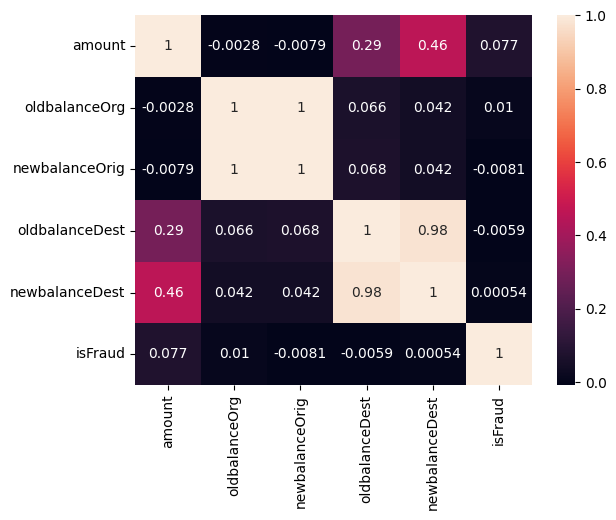

In [9]:
sns.heatmap(df.iloc[:,2:].corr(),annot=True)

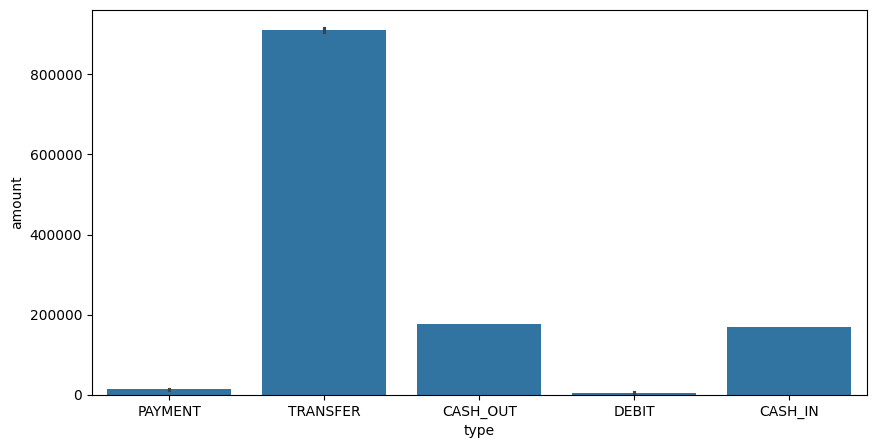

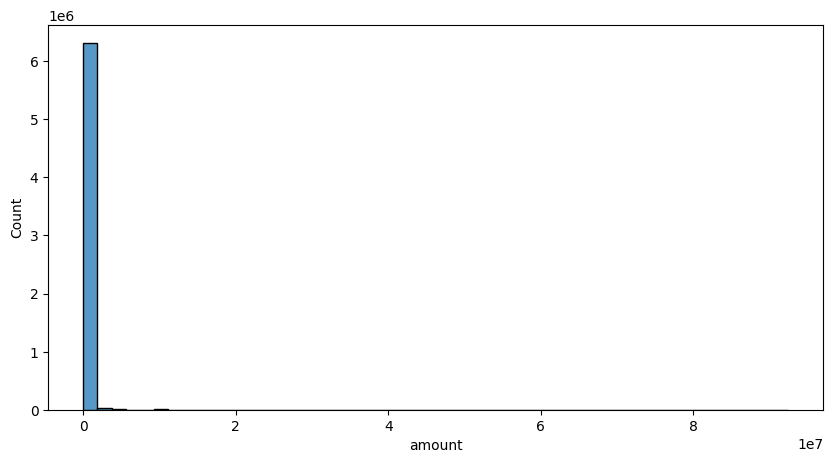

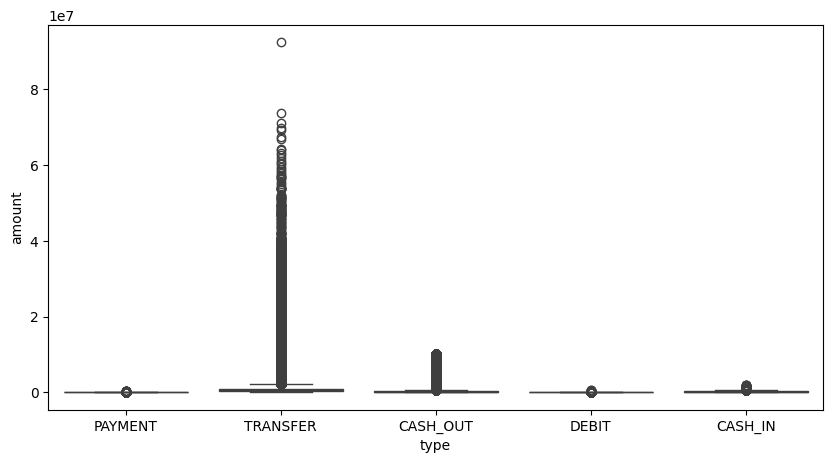

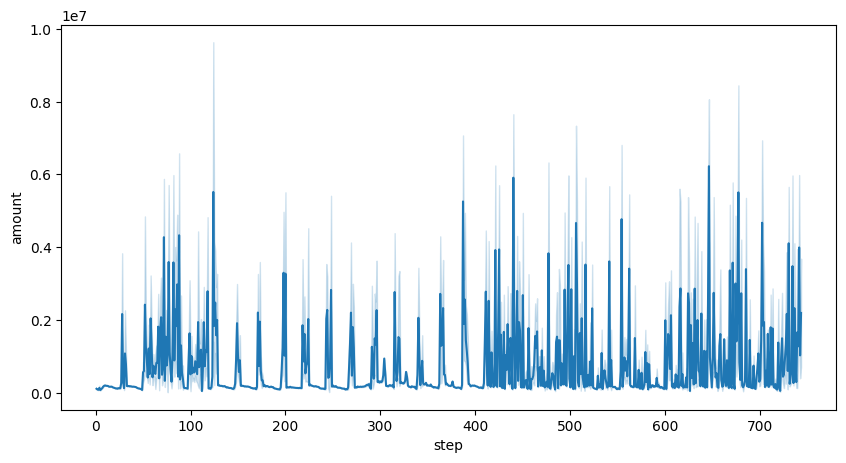

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


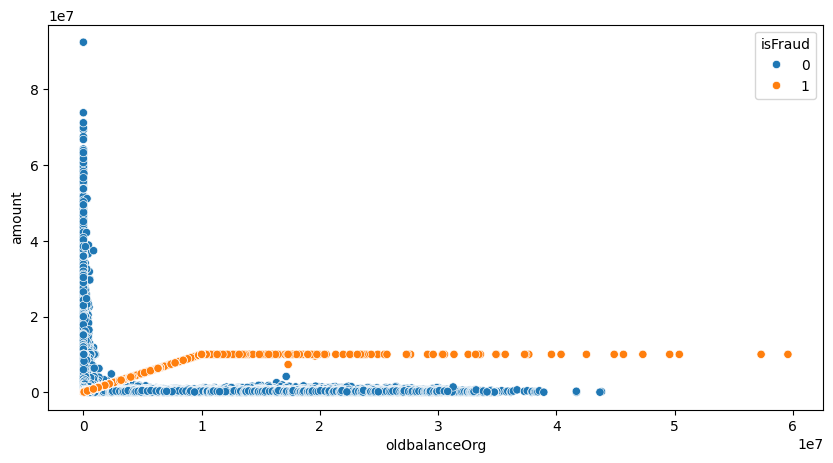

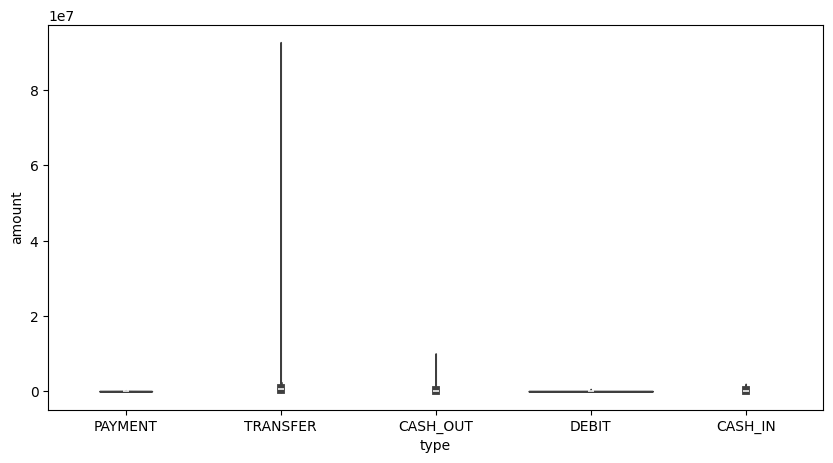

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='type',y='amount',data=df)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['amount'],bins=50)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='type',y='amount',data=df)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x='step',y='amount',data=df)
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=df)
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(x='type',y='amount',data=df)
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [13]:
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [15]:
encoder.fit(x_train[['type']])
encoded_train_data = encoder.fit_transform(x_train[['type']])
new_column_names = encoder.get_feature_names_out(['type'])
encoded_train_df = pd.DataFrame(encoded_train_data, columns=new_column_names, index=x_train.index)
x_train = pd.concat([x_train.drop('type', axis=1), encoded_train_df], axis=1)
encoded_test_data = encoder.transform(x_test[['type']])
encoded_test_df = pd.DataFrame(encoded_test_data, columns=new_column_names, index=x_test.index)
x_test = pd.concat([x_test.drop('type', axis=1), encoded_test_df], axis=1)

In [17]:
from imblearn.over_sampling import SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print("\nAfter SMOTE:")
print(pd.Series(y_train).value_counts())

Before SMOTE:
isFraud
0    5083503
1    5083503
Name: count, dtype: int64


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



After SMOTE:
isFraud
0    5083503
1    5083503
Name: count, dtype: int64


In [18]:
x_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,619,386385.08,4669568.85,5055953.92,506035.06,119649.98,1.0,0.0,0.0,0.0,0.0
1,164,212458.78,234635.00,447093.78,806037.88,593579.10,1.0,0.0,0.0,0.0,0.0
2,382,19967.60,3634.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0
3,180,527616.51,180216.00,0.00,92157.10,619773.61,0.0,1.0,0.0,0.0,0.0
4,36,206067.85,0.00,0.00,2131494.48,2337562.32,0.0,0.0,0.0,0.0,1.0


In [19]:
x_train.shape

(10167006, 11)

In [20]:
x_test.shape

(1272524, 11)

In [21]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
scaler = StandardScaler()

x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])

x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

print("Head of the scaled training data:")
x_train.head()

Head of the scaled training data:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1.809286,-0.237136,1.042517,1.806808,-0.100734,-0.319345,1.0,0.0,0.0,0.0,0.0
1,-0.821978,-0.329185,-0.310994,-0.030456,-0.003668,-0.185488,1.0,0.0,0.0,0.0,0.0
2,0.438715,-0.431060,-0.381494,-0.208684,-0.264462,-0.353139,0.0,0.0,0.0,1.0,0.0
3,-0.729450,-0.162390,-0.327602,-0.208684,-0.234645,-0.178090,0.0,1.0,0.0,0.0,0.0
4,-1.562202,-0.332568,-0.382603,-0.208684,0.425186,0.307084,0.0,0.0,0.0,0.0,1.0


In [22]:
import pickle
with open('Encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

In [23]:
import os
import pandas as pd

# Define the output directory name
output_dir = 'Processed_data'

# Create the directory if it doesn't already exist
os.makedirs(output_dir, exist_ok=True)

# --- Save your processed DataFrames and Series to CSV files ---

# Define the file paths using os.path.join for compatibility
x_train_path = os.path.join(output_dir, 'x_train_processed.csv')
x_test_path = os.path.join(output_dir, 'x_test_processed.csv')
y_train_path = os.path.join(output_dir, 'y_train.csv')
y_test_path = os.path.join(output_dir, 'y_test.csv')

# Use the .to_csv() method to save the data
# index=False prevents pandas from writing the DataFrame index as a column
x_train.to_csv(x_train_path, index=False)
x_test.to_csv(x_test_path, index=False)
y_train.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

print(f"Data successfully saved to the '{output_dir}' directory.")

Data successfully saved to the 'Processed_data' directory.


In [24]:
with open('Sclar.pkl','wb') as file:
    pickle.dump(scaler,file)

In [25]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          37G   24K   37G   1% /
tmpfs            64M     0   64M   0% /dev
tmpfs           7.8G     0  7.8G   0% /sys/fs/cgroup
shm             4.0G     0  4.0G   0% /dev/shm
/dev/nvme0n1p1   50G   19G   32G  37% /opt/.sagemakerinternal
/dev/nvme1n1     25G   16G  9.5G  63% /home/studio-lab-user
devtmpfs        7.8G     0  7.8G   0% /dev/tty
tmpfs           7.8G     0  7.8G   0% /proc/acpi
tmpfs           7.8G     0  7.8G   0% /sys/firmware
